In [412]:
import numpy as np
import pprint
import scipy
import scipy.linalg  as la
from math import copysign
from matplotlib import pyplot as plt

In [241]:
def householder_reflection(A):
    """Perform QR decomposition of matrix A using Householder reflection."""
    (num_rows, num_cols) = np.shape(A)

    # Initialize
    Q = np.identity(num_rows)
    R = np.copy(A)
    
    for cnt in range(num_rows - 1):
        x = R[cnt:, cnt]

        e = np.zeros_like(x)
        e[0] = copysign(np.linalg.norm(x), -A[cnt, cnt])
        u = x + e
        v = u / np.linalg.norm(u)

        Q_cnt = np.identity(num_rows)
        Q_cnt[cnt:, cnt:] -= 2.0 * np.outer(v, v)

        R = np.dot(Q_cnt, R)
        Q = np.dot(Q, Q_cnt.T)

    return (Q, R)

In [242]:
def uniqueQR(R,Q):
    signs = 2 * (np.diag(R) >= 0) - 1
    Q = Q * signs[np.newaxis, :]
    R = R * signs[:, np.newaxis]
    return (R,Q)

In [166]:
A1 = np.array([[12, -51, 4],
              [6, 167, -68],
              [-4, 24, -41]], dtype=np.float64)

In [167]:
(Q,R) = householder_reflection(A1)

In [137]:
print('Q\n',Q)
print('\n\nR\n',R)
print('\n\nround(R)\n',np.round(R))

Q
 [[ 0.85714286 -0.39428571  0.33142857]
 [ 0.42857143  0.90285714 -0.03428571]
 [-0.28571429  0.17142857  0.94285714]]


R
 [[ 1.40000000e+01  2.10000000e+01 -1.40000000e+01]
 [ 5.50670620e-16  1.75000000e+02 -7.00000000e+01]
 [-3.01980663e-16  0.00000000e+00 -3.50000000e+01]]


round(R)
 [[ 14.  21. -14.]
 [  0. 175. -70.]
 [ -0.   0. -35.]]


In [138]:
(R,Q) = uniqueQR(R,Q)

In [139]:
print('Q\n',Q)
print('\n\nR\n',R)
print('\n\nround(R)\n',np.round(R))

Q
 [[ 0.85714286 -0.39428571 -0.33142857]
 [ 0.42857143  0.90285714  0.03428571]
 [-0.28571429  0.17142857 -0.94285714]]


R
 [[ 1.40000000e+01  2.10000000e+01 -1.40000000e+01]
 [ 5.50670620e-16  1.75000000e+02 -7.00000000e+01]
 [ 3.01980663e-16 -0.00000000e+00  3.50000000e+01]]


round(R)
 [[ 14.  21. -14.]
 [  0. 175. -70.]
 [  0.  -0.  35.]]


**Compare with numpy**

In [117]:
q,r = np.linalg.qr(A)

In [140]:
print('Q\n',q)
print('\n\nR\n',r)

Q
 [[-0.85714286  0.39428571  0.33142857]
 [-0.42857143 -0.90285714 -0.03428571]
 [ 0.28571429 -0.17142857  0.94285714]]


R
 [[ -14.  -21.   14.]
 [   0. -175.   70.]
 [   0.    0.  -35.]]


# Q2

In [244]:
def create_rnd_ortho(size = (3,3), unique = True, sigma = 0.1, mu = 5):
    np.random.seed(36)
    A = np.random.normal(mu, sigma, size = size)
    (Q,R) = householder_reflection(A)
    if unique == True:
        (R,Q) = uniqueQR(R,Q)
    return (R,Q)

In [164]:
R,Q = create_rnd_ortho(size = (3,3), unique = True, sigma = 0.1, mu = 5)
print('Q\n',Q)
print('\n\nR\n',R)

Q
 [[ 0.5801961   0.16757265 -0.797052  ]
 [ 0.58596029 -0.76558332  0.26557997]
 [ 0.56570578  0.62112928  0.54237938]]


R
 [[ 8.73064323e+00  8.69869529e+00  8.81100829e+00]
 [-4.38867764e-17  2.52227976e-01  2.25801151e-01]
 [ 1.60058486e-15 -2.77555756e-17  7.81146140e-02]]


# Q3

In [95]:
def householder_reflection_hess(A):
    """Perform QR decomposition of matrix A using Householder reflection."""
    (num_rows, num_cols) = np.shape(A)

    # Initialize orthogonal matrix Q and upper triangular matrix R.
    Q = np.identity(num_rows)
    H = np.copy(A)

    # Iterative over column sub-vector and
    # compute Householder matrix to zero-out lower triangular matrix entries.
    for cnt in range(num_rows - 2):
        x = H[cnt+1:, cnt]

        e = np.zeros_like(x)
        e[0] = copysign(np.linalg.norm(x), A[cnt+1, cnt])
        u = x + e
        v = u / np.linalg.norm(u)
        v = v.reshape(-1,1)
        
        H[cnt+1:,cnt:] = H[cnt+1:,cnt:] - 2*np.dot(v, np.dot(v.T, H[cnt+1:,cnt:]))
        H[:,cnt+1:] = H[:,cnt+1:]- 2*np.dot(np.dot(H[:,cnt+1:], v), v.T)
        Q[cnt+1:,:] = Q[cnt+1:,:] - 2*np.dot(v, np.dot(v.T, Q[cnt+1:,:]))

    return (Q.T, H)

In [34]:
A1 = np.array([[12, -51, 4],
              [6, 167, -68],
              [-4, 24, -41]], dtype=np.float64)

In [36]:
(Q, H) = householder_reflection_hess(A1)
np.round(H)

array([[  12.,   45.,  -25.],
       [  -7.,  123.,  -42.],
       [  -0., -134.,    3.]])

In [37]:
A = np.random.normal(0, 5, size = (5,5))
(Q,H) = householder_reflection_hess(A)

In [38]:
np.round(H)

array([[ -5., -13.,  -7.,  -5.,  -1.],
       [ -8.,  -5.,  -3.,   4.,   2.],
       [ -0.,  -5.,  -4.,  -1.,  -6.],
       [ -0.,   0.,   8.,  -3.,   0.],
       [  0.,   0.,  -0., -10.,  -3.]])

In [96]:
A = np.array([[ 9., 5 , -3., 15.,  3.],
               [ 5,  8.,  4.,-8.,  15],
               [-3., 4.,  1., 4., -1.],
               [ 15.,-8.,  4., 25, -4.],
               [ 3., 15, -1.,-4.,  3.]], dtype=np.float64)

In [102]:
(Q,H) = householder_reflection_hess(A)

In [103]:
np.round(H)

array([[  9., -16.,   0.,  -0.,  -0.],
       [-16.,  16., -12.,  -0.,   0.],
       [ -0., -12.,  13., -15.,   0.],
       [  0.,  -0., -15.,   9.,   9.],
       [  0.,   0.,   0.,   9.,  -0.]])

In [99]:
np.round(np.dot(np.dot(Q, H), Q.T))

array([[ 9.,  5., -3., 15.,  3.],
       [ 5.,  8.,  4., -8., 15.],
       [-3.,  4.,  1.,  4., -1.],
       [15., -8.,  4., 25., -4.],
       [ 3., 15., -1., -4.,  3.]])

In [100]:
H, Q = la.hessenberg(A, calc_q=True)
np.round(H)

array([[  9., -16.,   0.,   0.,  -0.],
       [-16.,  16.,  12.,  -0.,  -0.],
       [  0.,  12.,  13.,  15.,  -0.],
       [  0.,   0.,  15.,   9.,  -9.],
       [  0.,   0.,   0.,  -9.,  -0.]])

In [101]:
np.round(np.dot(np.dot(Q, H), Q.T))

array([[ 9.,  5., -3., 15.,  3.],
       [ 5.,  8.,  4., -8., 15.],
       [-3.,  4.,  1.,  4., -1.],
       [15., -8.,  4., 25., -4.],
       [ 3., 15., -1., -4.,  3.]])

# Q4

In [448]:
a = [4.5448681745752, 4.449390153986741, 4.478644761231849, 4.513882525503117, 4.691534338820382, 4.8663479488688495, 5.194834070803874, 4.6674369902573725, 4.057822439868228, 5.040729686752157, 4.738017538080876, 5.003772774085626, 4.318195399277631, 4.263305013099897]
a[-1]

4.263305013099897

In [546]:
def householder_reflection_shifted(A,true_eigs,plot_metrics = True, qr_alg = 'basic',
                                   tol = 1e-6, itr = 1000,verbose = False):
    """Perform QR decomposition of matrix A using Householder reflection."""
    m,n = A.shape
    iteration = 0
    errors_smallest = []
    errors_middle = []
    errors_largest = []
    
    smallest_top_neighbor_abs = []
    smallest_left_neighbor_abs = []
    
    middle_top_neighbor_abs = []
    middle_left_neighbor_abs = []
    
    largest_top_neighbor_abs = []
    largest_left_neighbor_abs = []
    
    eig_values = np.zeros((m, ), dtype='float')
    if qr_alg == 'basic':
        Ak = np.copy(A)
        for i in range(itr):
            eig_list = []
            Q, R = householder_reflection(Ak)
            Ak = np.dot(R, Q)
            
            if plot_metrics == True:
                d = np.diag(Ak)
                sort_args = np.argsort(d)
                smallest_arg = sort_args[0]
                middle_arg = sort_args[int(len(sort_args)//2)]
                largest_arg = sort_args[len(sort_args) - 1]

                eig_list.append(d[smallest_arg])
                eig_list.append(d[middle_arg])
                eig_list.append(d[largest_arg])
                
                errors_smallest.append(np.abs(eig_list[0] - true_eigs[0]))
                errors_middle.append(np.abs(eig_list[1] - true_eigs[1]))
                errors_largest.append(np.abs(eig_list[2] - true_eigs[2]))
                if smallest_arg-1 >= 0:
                    smallest_top_neighbor_abs.append(np.abs(Ak[smallest_arg,smallest_arg-1]))
                    smallest_left_neighbor_abs.append(np.abs(Ak[smallest_arg-1,smallest_arg-1]))
                if middle_arg-1 >= 0:
                    middle_top_neighbor_abs.append(np.abs(Ak[middle_arg,middle_arg-1]))
                    middle_left_neighbor_abs.append(np.abs(Ak[middle_arg-1,middle_arg-1]))
                if largest_arg-1 >= 0:
                    largest_top_neighbor_abs.append(np.abs(Ak[largest_arg,largest_arg-1]))
                    largest_left_neighbor_abs.append(np.abs(Ak[largest_arg-1,largest_arg-1]))
        eig_values = np.diag(Ak)
    elif qr_alg == 'wilkinson':
        Ak = np.copy(A) # = A0 = A
        m -= 1
        mu = 0
        
        while m > 0:
            eig_list = []
            chosen_eig_list = []
            
            Q, R = householder_reflection(Ak - np.identity(Ak.shape[0])*mu)
            Ak = np.dot(R, Q) + np.identity(Ak.shape[0])*mu
            delta = (Ak[m - 1, m - 1] - Ak[m, m]) / 2
            mu = Ak[m, m] - np.sign(delta) * Ak[m, m - 1] / \
            (np.abs(delta) + np.linalg.norm([delta, Ak[m, m - 1]]))
            if verbose == True:
                print(np.abs(Ak[m, m - 1]), '      ', m)
            if np.abs(Ak[m, m - 1]) < tol:
                eig_values[m] = Ak[m, m]
                Ak = Ak[:m, :m]
                m -= 1
            
            if plot_metrics == True:
                d = np.diag(Ak)
                for t in range(eig_values.shape[0]):
                    if eig_values[t] != 0:
                        eig_list.append(eig_values[t])
                l = len(eig_list)
                for t in range(d.shape[0]):
                    eig_list.append(d[t])
                    
                sort_args = np.argsort(eig_list)
                smallest_arg = sort_args[0]
                middle_arg = sort_args[int(len(sort_args)//2)]
                largest_arg = sort_args[len(sort_args) - 1]
                
                if smallest_arg < l:
                    if not errors_smallest:
                        errors_smallest.append(np.abs(eig_list[-1] - true_eigs[-1]))
                    else:
                        errors_smallest.append(errors_smallest[-1])
                    if smallest_top_neighbor_abs:
                        smallest_top_neighbor_abs.append(smallest_top_neighbor_abs[-1])
                        smallest_left_neighbor_abs.append(smallest_left_neighbor_abs[-1])
                else:
                    chosen_eig_list.append(eig_list[smallest_arg])
                    errors_smallest.append(np.abs(chosen_eig_list[-1] - true_eigs[-1]))
                    if smallest_arg-l-1 >= 0:
                        smallest_top_neighbor_abs.append(np.abs(Ak[smallest_arg-l,smallest_arg-l-1]))
                        smallest_left_neighbor_abs.append(np.abs(Ak[smallest_arg-l-1,smallest_arg-l-1]))
                
                
                
                if middle_arg < l:
                    if not errors_middle:
                        errors_middle.append(np.abs(eig_list[-1] - true_eigs[-1]))
                    else:
                        errors_middle.append(errors_middle[-1])
                    if middle_top_neighbor_abs:
                        middle_top_neighbor_abs.append(middle_top_neighbor_abs[-1])
                        middle_left_neighbor_abs.append(middle_left_neighbor_abs[-1])   
                else:
                    chosen_eig_list.append(eig_list[middle_arg])
                    errors_middle.append(np.abs(chosen_eig_list[-1] - true_eigs[-1]))
                    if middle_arg-l-1 >= 0:
                        middle_top_neighbor_abs.append(np.abs(Ak[middle_arg-l,middle_arg-l-1]))
                        middle_left_neighbor_abs.append(np.abs(Ak[middle_arg-l-1,middle_arg-l-1]))
                    
                if largest_arg < l:
                    if not errors_largest:
                        errors_largest.append(np.abs(eig_list[-1] - true_eigs[-1]))
                    else:
                        errors_largest.append(errors_largest[-1])
                    if largest_top_neighbor_abs:
                        largest_top_neighbor_abs.append(largest_top_neighbor_abs[-1])
                        largest_left_neighbor_abs.append(largest_left_neighbor_abs[-1])
                else:
                    chosen_eig_list.append(eig_list[largest_arg])
                    errors_largest.append(np.abs(chosen_eig_list[-1] - true_eigs[-1]))
                    if largest_arg-l-1 >= 0:
                        largest_top_neighbor_abs.append(np.abs(Ak[largest_arg-l,largest_arg-l-1]))
                        largest_left_neighbor_abs.append(np.abs(Ak[middle_arg-l-1,largest_arg-l-1]))    
        eig_values[0] = Ak
    elif qr_alg == 'rayleigh':
        Ak = np.copy(A) # = A0 = A
        m -= 1
        mu = 0
        
        while m > 0:
            eig_list = []
            chosen_eig_list = []
            mu = Ak[m,m]
            Q, R = householder_reflection(Ak - np.identity(Ak.shape[0])*mu)
            Ak = np.dot(R, Q) + np.identity(Ak.shape[0])*mu
            if verbose == True:
                print(np.abs(Ak[m, m - 1]), '      ', m)
            if np.abs(Ak[m, m - 1]) < tol:
                eig_values[m] = Ak[m, m]
                Ak = Ak[:m, :m]
                m -= 1
            
            if plot_metrics == True:
                d = np.diag(Ak)
                for t in range(eig_values.shape[0]):
                    if eig_values[t] != 0:
                        eig_list.append(eig_values[t])
                l = len(eig_list)
                for t in range(d.shape[0]):
                    eig_list.append(d[t])
                    
                sort_args = np.argsort(eig_list)
                smallest_arg = sort_args[0]
                middle_arg = sort_args[int(len(sort_args)//2)]
                largest_arg = sort_args[len(sort_args) - 1]
                
                if smallest_arg < l:
                    if not errors_smallest:
                        errors_smallest.append(np.abs(eig_list[-1] - true_eigs[-1]))
                    else:
                        errors_smallest.append(errors_smallest[-1])
                    if smallest_top_neighbor_abs:
                        smallest_top_neighbor_abs.append(smallest_top_neighbor_abs[-1])
                        smallest_left_neighbor_abs.append(smallest_left_neighbor_abs[-1])
                else:
                    chosen_eig_list.append(eig_list[smallest_arg])
                    errors_smallest.append(np.abs(chosen_eig_list[-1] - true_eigs[-1]))
                    if smallest_arg-l-1 >= 0:
                        smallest_top_neighbor_abs.append(np.abs(Ak[smallest_arg-l,smallest_arg-l-1]))
                        smallest_left_neighbor_abs.append(np.abs(Ak[smallest_arg-l-1,smallest_arg-l-1]))
                    
                if middle_arg < l:
                    if not errors_middle:
                        errors_middle.append(np.abs(eig_list[-1] - true_eigs[-1]))
                    else:
                        errors_middle.append(errors_middle[-1])
                    if middle_top_neighbor_abs:
                        middle_top_neighbor_abs.append(middle_top_neighbor_abs[-1])
                        middle_left_neighbor_abs.append(middle_left_neighbor_abs[-1])                    
                else:
                    chosen_eig_list.append(eig_list[middle_arg])
                    errors_middle.append(np.abs(chosen_eig_list[-1] - true_eigs[-1]))
                    if middle_arg-l-1 >= 0:
                        middle_top_neighbor_abs.append(np.abs(Ak[middle_arg-l,middle_arg-l-1]))
                        middle_left_neighbor_abs.append(np.abs(Ak[middle_arg-l-1,middle_arg-l-1]))
                    
                if largest_arg < l:
                    if not errors_largest:
                        errors_largest.append(np.abs(eig_list[-1] - true_eigs[-1]))
                    else:
                        errors_largest.append(errors_largest[-1])
                    if largest_top_neighbor_abs:
                        largest_top_neighbor_abs.append(largest_top_neighbor_abs[-1])
                        largest_left_neighbor_abs.append(largest_left_neighbor_abs[-1])
                else:
                    chosen_eig_list.append(eig_list[largest_arg])
                    errors_largest.append(np.abs(chosen_eig_list[-1] - true_eigs[-1]))
                    if largest_arg-l-1 >= 0:
                        largest_top_neighbor_abs.append(np.abs(Ak[largest_arg-l,largest_arg-l-1]))
                        largest_left_neighbor_abs.append(np.abs(Ak[largest_arg-l-1,largest_arg-l-1]))
        eig_values[0] = Ak
    if plot_metrics == True:
        plt.plot(np.log(errors_smallest))
        plt.title('smallest eig value error')
        plt.xlabel('iteration')
        plt.ylabel('Error')
        plt.grid()
        plt.show()

        plt.plot(np.log(errors_middle))
        plt.title('middle eig value error')
        plt.xlabel('iteration')
        plt.ylabel('Error')
        plt.grid()
        plt.show()

        plt.plot(np.log(errors_largest))
        plt.title('largets eig value error')
        plt.xlabel('iteration')
        plt.ylabel('Error')
        plt.grid()
        plt.show()

        plt.plot(np.log(smallest_top_neighbor_abs),'', np.log(middle_top_neighbor_abs),'-',
                 np.log(largest_top_neighbor_abs),'-')
        plt.title('absolute value of top neighbors')
        plt.xlabel('iteration')
        plt.ylabel('Error')
        plt.legend(['smallest','middle','largest'])
        plt.grid()
        plt.show()

        plt.plot(np.log(smallest_left_neighbor_abs),'', np.log(middle_left_neighbor_abs),'-',
                 np.log(largest_left_neighbor_abs),'-')
        plt.title('absolute value of top neighbors')
        plt.xlabel('iteration')
        plt.ylabel('Error')
        plt.legend(['smallest','middle','largest'])
        plt.grid()
        plt.show()
            
    return eig_values

In [346]:
H = np.array([[ 9., -16.,   0.,  0.,   0.],
              [-16., 16., -12.,  0.,   0.],
              [ 0., -12.,  13.,-15.,   0.],
              [ 0.,   0., -15.,  9.,   9.],
              [ 0.,   0.,   0.,  9.,  10]])

In [353]:
eig_values =  householder_reflection_shifted(A, qr_alg = 'basic', tol = 1e-6, itr = 20 )

In [424]:
eig_values

array([9.99998379, 8.9998546 , 8.0001468 , 7.00001018, 6.00000418,
       5.00000046, 4.        , 3.        , 2.        , 1.        ])

# Q5

In [356]:
_,Q = create_rnd_ortho(size = (10,10), unique = True, sigma = 5, mu = 10)
D = np.diag([1,2,3,4,5,6,7,8,9,10])
if False:
    print('\nD\n',D)
A = np.dot(Q.T, np.dot(D,Q))
if False:
    print('\nA\n',np.round(A))
_,H = householder_reflection_hess(A)
np.round(H)

array([[ 5., -3., -0.,  0., -0., -0., -0., -0.,  0.,  0.],
       [-3.,  4., -3., -0., -0., -0., -0., -0.,  0.,  0.],
       [-0., -3.,  6.,  2., -0., -0.,  0.,  0.,  0., -0.],
       [ 0.,  0.,  2.,  6., -2., -0., -0.,  0., -0.,  0.],
       [-0., -0.,  0., -2.,  5., -2., -0., -0., -0., -0.],
       [ 0.,  0., -0.,  0., -2.,  6., -2., -0.,  0., -0.],
       [-0.,  0., -0.,  0.,  0., -2.,  5.,  2., -0., -0.],
       [-0., -0.,  0.,  0.,  0.,  0.,  2.,  6.,  1.,  0.],
       [-0., -0., -0.,  0.,  0.,  0., -0.,  1.,  6., -1.],
       [-0., -0., -0., -0.,  0., -0.,  0.,  0., -1.,  5.]])

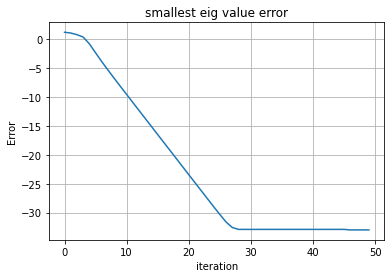

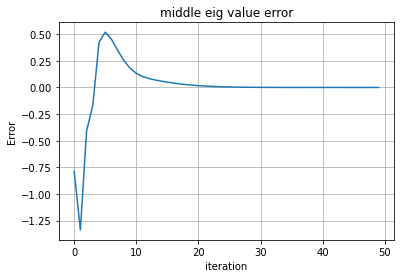

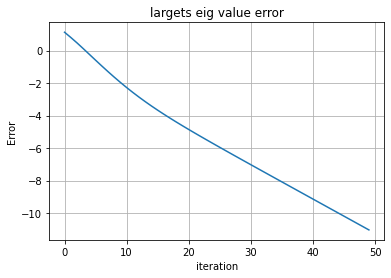

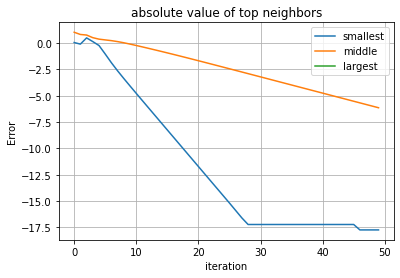

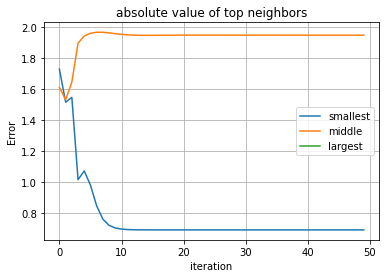


eig_values:
 [9.99998379 8.9998546  8.0001468  7.00001018 6.00000418 5.00000046
 4.         3.         2.         1.        ]


In [458]:
#basic QR
eig_values = householder_reflection_shifted(H,true_eigs=[1,5,10],plot_metrics = True, qr_alg = 'basic',
                                   tol = 1e-6, itr = 50,verbose = False)
print('\neig_values:\n',eig_values)

[]


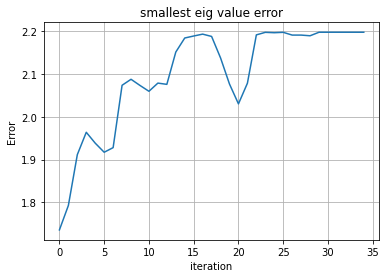

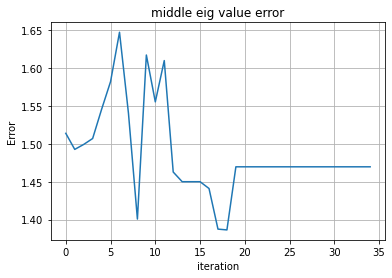

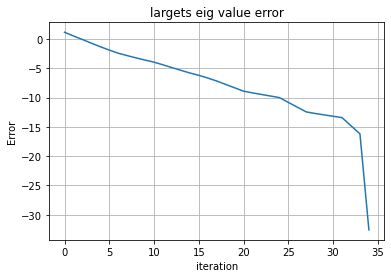

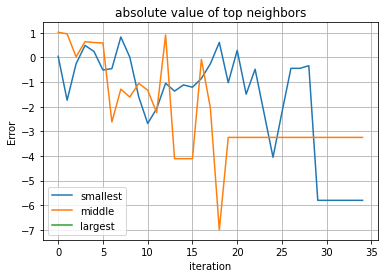

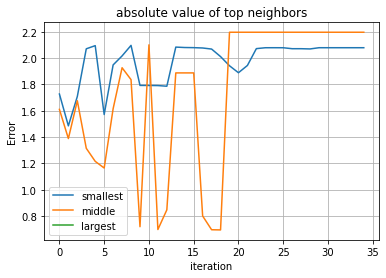


eig_values
 [10.  9.  8.  1.  7.  2.  6.  5.  3.  4.]


In [461]:
#wilinson shift QR
eig_values = householder_reflection_shifted(H,true_eigs=[1,5,10],plot_metrics = True, qr_alg = 'wilkinson',
                                            tol = 1e-6, itr = 50,verbose = False)
print('\neig_values\n',np.round(eig_values))

[5.64192374658759, 5.910480597748209, 5.578601657733727, 4.87799868616036, 2.9323816914736183, 2.76234467062945, 3.39985743552829, 2.8397408466193736, 3.1679433767284113, 3.1679433767284113]


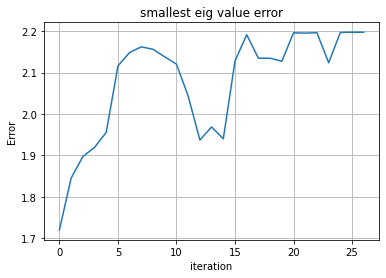

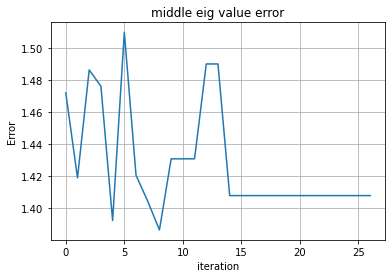

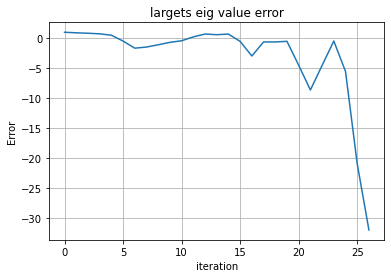

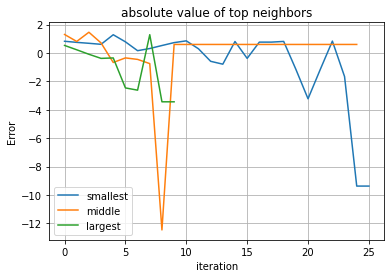

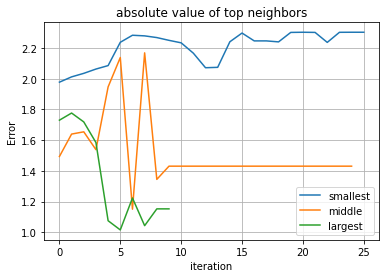

In [463]:
#rayleigh QR
eig_values = householder_reflection_shifted(H,true_eigs=[1,5,10],plot_metrics = True, qr_alg = 'rayleigh',
                                            tol = 1e-6, itr = 50,verbose = False)

# Q6

In [464]:
_,Q = create_rnd_ortho(size = (10,10), unique = True, sigma = 5, mu = 10)

**negative eigenvalues**

In [494]:
D = -1.0*np.diag([1,2,3,4,5,6,7,8,9,10])
if False:
    print('\nD\n',D)
A = np.dot(Q.T, np.dot(D,Q))
if False:
    print('\nA\n',np.round(A))
_,H = householder_reflection_hess(A)
np.round(H)

array([[-5.,  3.,  0., -0.,  0.,  0.,  0.,  0., -0., -0.],
       [ 3., -4.,  3.,  0.,  0.,  0.,  0.,  0., -0., -0.],
       [ 0.,  3., -6., -2.,  0.,  0., -0., -0., -0.,  0.],
       [-0., -0., -2., -6.,  2.,  0.,  0., -0.,  0., -0.],
       [ 0.,  0., -0.,  2., -5.,  2.,  0.,  0.,  0.,  0.],
       [-0., -0.,  0.,  0.,  2., -6.,  2.,  0., -0.,  0.],
       [ 0., -0.,  0.,  0., -0.,  2., -5., -2.,  0.,  0.],
       [ 0.,  0., -0.,  0., -0., -0., -2., -6., -1., -0.],
       [ 0.,  0.,  0.,  0., -0., -0.,  0., -1., -6.,  1.],
       [ 0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  1., -5.]])

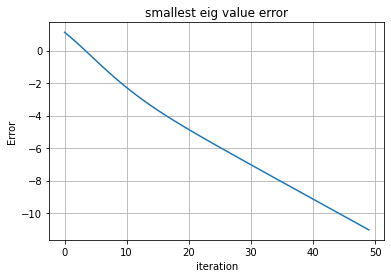

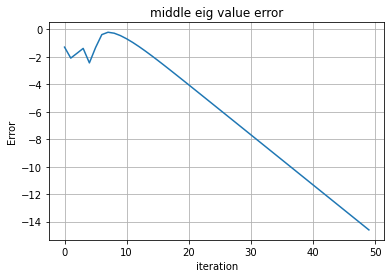

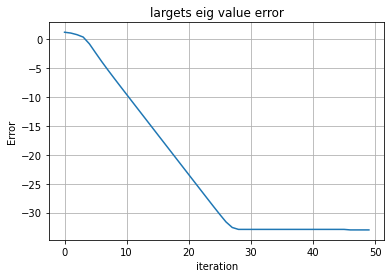

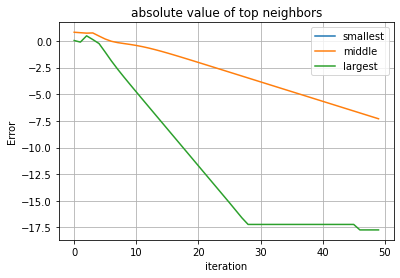

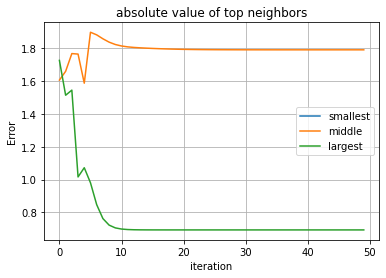


eig_values:
 [-9.99998379 -8.9998546  -8.0001468  -7.00001018 -6.00000418 -5.00000046
 -4.         -3.         -2.         -1.        ]


In [495]:
#basic QR
eig_values = householder_reflection_shifted(H,true_eigs=[-10,-5,-1],plot_metrics = True, qr_alg = 'basic',
                                   tol = 1e-6, itr = 50,verbose = False)
print('\neig_values:\n',eig_values)

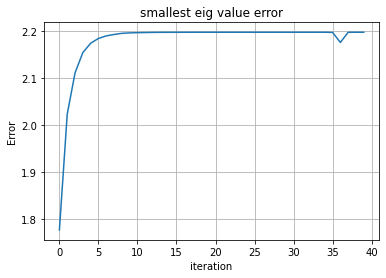

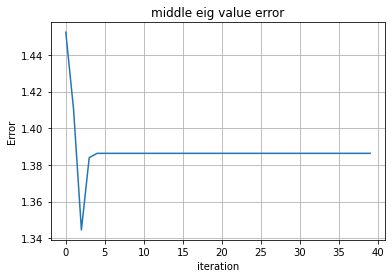

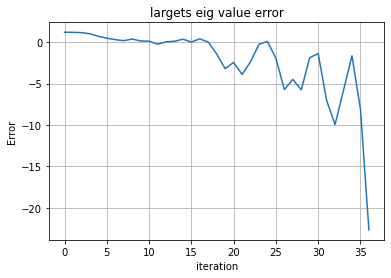

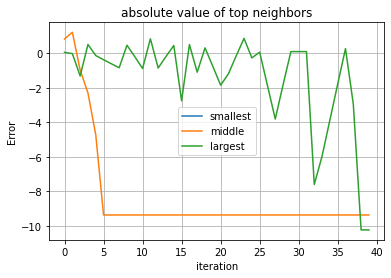

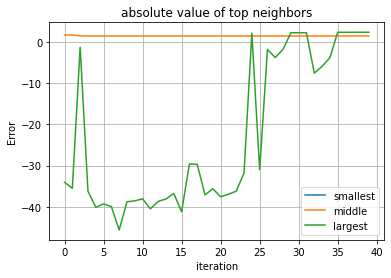


eig_values
 [-10.  -1.  -9.  -8.  -2.  -7.  -3.  -6.  -4.  -5.]


In [501]:
#wilinson shift QR
eig_values = householder_reflection_shifted(H,true_eigs=[-10,-5,-1],plot_metrics = True, qr_alg = 'wilkinson',
                                            tol = 1e-6, itr = 50,verbose = False)
print('\neig_values\n',np.round(eig_values))

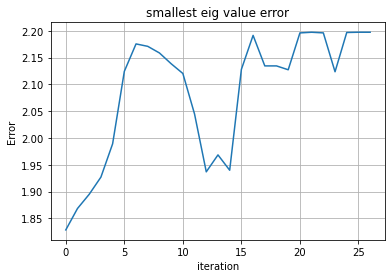

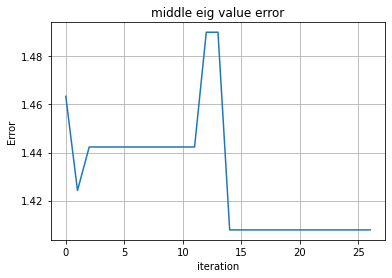

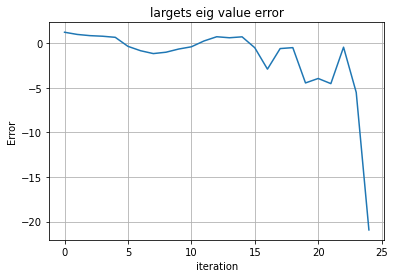

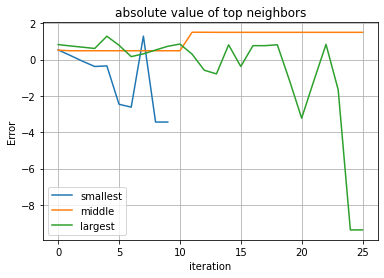

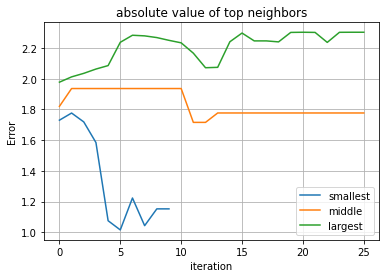

In [502]:
#rayleigh QR
eig_values = householder_reflection_shifted(H,true_eigs=[-10,-5,-1],plot_metrics = True, qr_alg = 'rayleigh',
                                            tol = 1e-6, itr = 50,verbose = False)

**multiple eigenvalues**

In [506]:
D = np.diag([1,2,3,3,5,3,7,7,7,7])
if False:
    print('\nD\n',D)
A = np.dot(Q.T, np.dot(D,Q))
if False:
    print('\nA\n',np.round(A))
_,H = householder_reflection_hess(A)
np.round(H)

array([[ 4., -2., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.],
       [-2.,  4., -2., -0., -0., -0., -0., -0.,  0.,  0.],
       [ 0., -2.,  4.,  1., -0.,  0., -0.,  0.,  0., -0.],
       [ 0., -0.,  1.,  4., -1.,  0., -0.,  0., -0.,  0.],
       [ 0.,  0., -0., -1.,  2., -0.,  0., -0., -0.,  0.],
       [ 0., -0., -0., -0., -0.,  7., -0., -0.,  0.,  0.],
       [ 0., -0., -0., -0., -0., -0.,  3.,  0.,  0.,  0.],
       [ 0., -0., -0., -0.,  0.,  0.,  0.,  7.,  0., -0.],
       [ 0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  3.,  0.],
       [ 0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,  7.]])

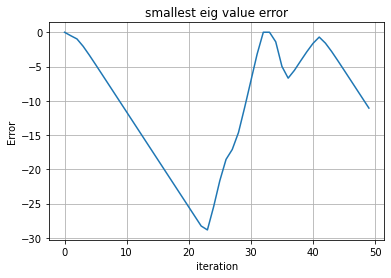

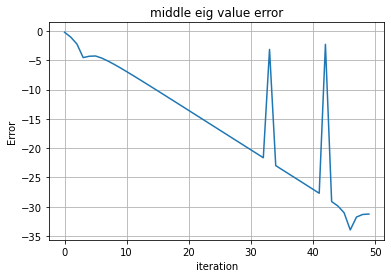

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: divide by zero encountered in log


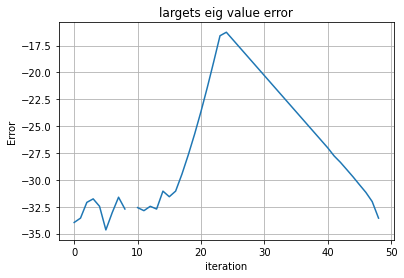

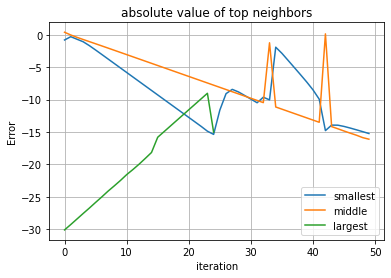

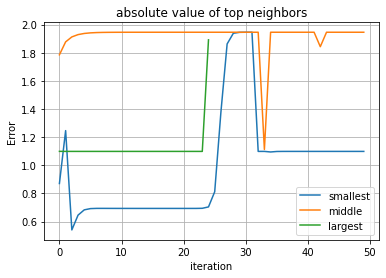


eig_values:
 [7.         5.         6.99999419 6.99995458 3.00005141 6.99999981
 3.         1.99998441 3.         1.0000156 ]


In [507]:
#basic QR
eig_values = householder_reflection_shifted(H,true_eigs=[1,5,7],plot_metrics = True, qr_alg = 'basic',
                                   tol = 1e-6, itr = 50,verbose = False)
print('\neig_values:\n',eig_values)

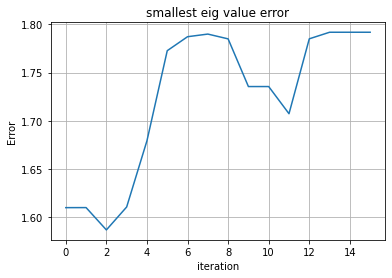

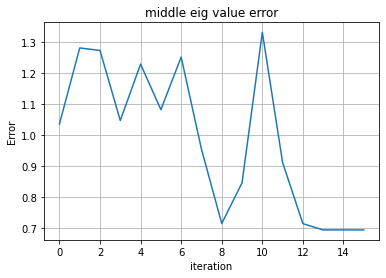

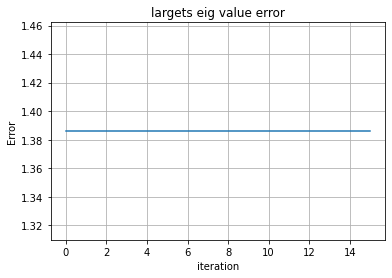

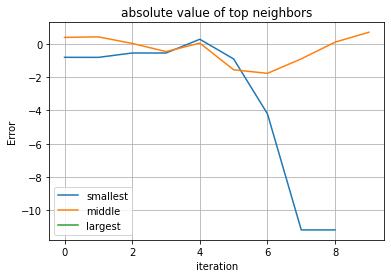

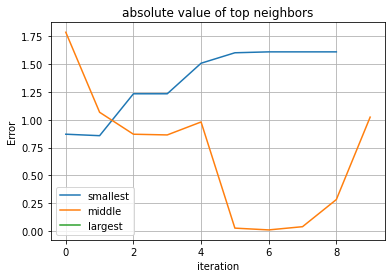


eig_values
 [5. 1. 2. 3. 3. 3. 7. 7. 7. 7.]


In [531]:
#wilinson shift QR
eig_values = householder_reflection_shifted(H,true_eigs=[1,5,7],plot_metrics = True, qr_alg = 'wilkinson',
                                            tol = 1e-6, itr = 50,verbose = False)
print('\neig_values\n',np.round(eig_values))

**extremely small eig vlaue**

In [535]:
D = np.diag([1,2,3,4,5,6,7,8,9,10])*1e-6
if False:
    print('\nD\n',D)
A = np.dot(Q.T, np.dot(D,Q))
if False:
    print('\nA\n',np.round(A))
_,H = householder_reflection_hess(A)
H

array([[ 4.86964797e-06, -2.57248991e-06, -5.15604138e-23,
         2.22256591e-22,  7.31564333e-23, -3.80967005e-22,
        -4.38652810e-22,  1.38471212e-22,  3.22385717e-22,
         1.70831889e-22],
       [-2.57248991e-06,  4.47043268e-06, -2.64011280e-06,
        -5.89460754e-22, -2.39166501e-22,  4.21785413e-22,
        -4.23970712e-23,  1.14450684e-22, -4.33801241e-22,
         4.33845532e-23],
       [-5.29395592e-23, -2.64011280e-06,  6.34336458e-06,
         2.14983538e-06,  1.58209516e-21, -4.87220130e-23,
        -7.98326116e-22,  2.33995454e-21, -4.58117810e-22,
        -1.48544339e-21],
       [ 1.05879118e-22,  0.00000000e+00,  2.14983538e-06,
         6.17315799e-06, -2.39709042e-06,  5.02757527e-23,
        -6.75888701e-22,  8.20970741e-22, -2.40873869e-22,
        -4.38851945e-22],
       [-2.11758237e-22,  0.00000000e+00, -5.29395592e-23,
        -2.39709042e-06,  5.08849650e-06, -1.88526366e-06,
         1.07017159e-21, -7.41608318e-22, -4.66099179e-22,
         9.

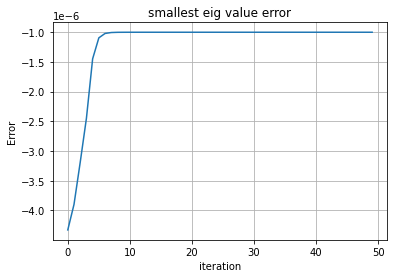

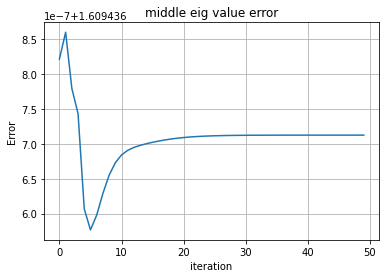

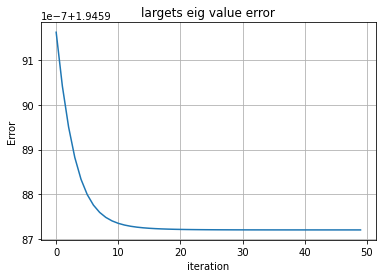

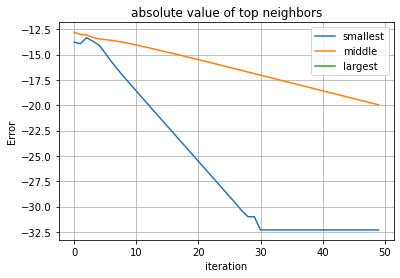

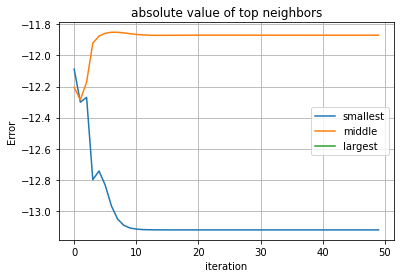


eig_values:
 [9.99998379e-06 8.99985460e-06 8.00014680e-06 7.00001018e-06
 6.00000418e-06 5.00000046e-06 4.00000000e-06 3.00000000e-06
 2.00000000e-06 1.00000000e-06]


In [536]:
#basic QR
eig_values = householder_reflection_shifted(H,true_eigs=[1,5,7],plot_metrics = True, qr_alg = 'basic',
                                   tol = 1e-6, itr = 50,verbose = False)
print('\neig_values:\n',eig_values)

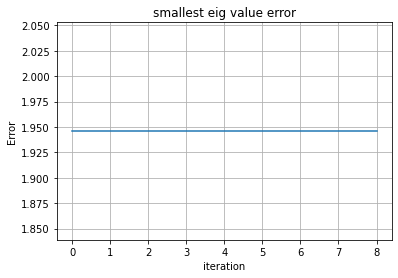

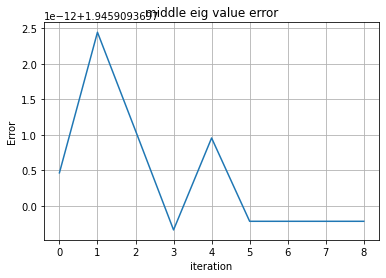

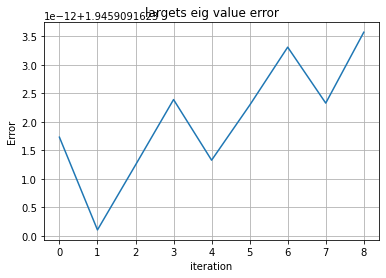

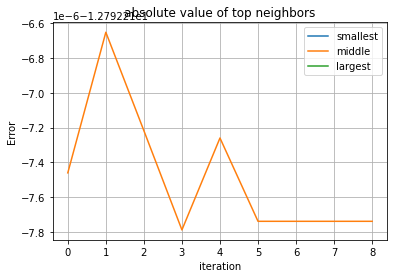

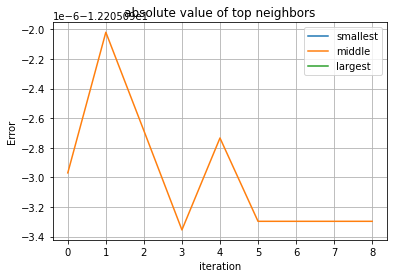


eig_values
 [6.90746877e-06 6.63988078e-06 5.00488225e-06 5.45515403e-06
 4.98817662e-06 5.27308653e-06 5.89883610e-06 4.88010400e-06
 5.62538918e-06 4.32702175e-06]


In [548]:
#wilinson shift QR
eig_values = householder_reflection_shifted(H,true_eigs=[1,5,7],plot_metrics = True, qr_alg = 'wilkinson',
                                            tol = 1e-4, itr = 50,verbose = False)
print('\neig_values\n',eig_values)

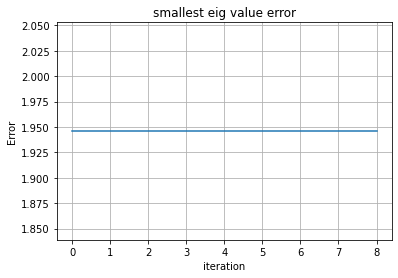

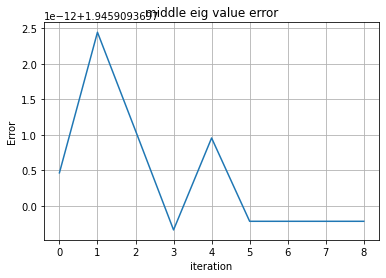

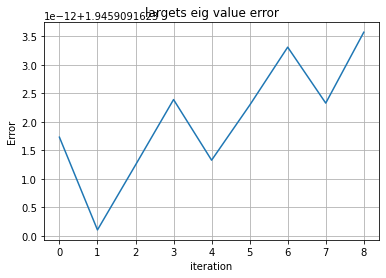

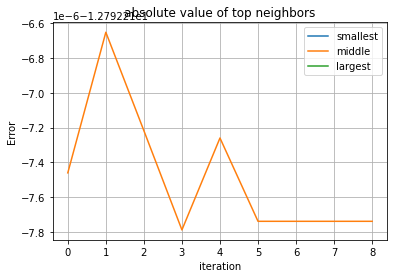

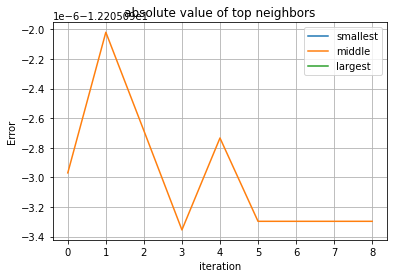


eig_values
 [6.90746877e-06 6.63988078e-06 5.00488225e-06 5.45515403e-06
 4.98817662e-06 5.27308653e-06 5.89883610e-06 4.88010400e-06
 5.62538918e-06 4.32702175e-06]


In [552]:
#wilinson shift QR
eig_values = householder_reflection_shifted(H,true_eigs=[1,5,7],plot_metrics = True, qr_alg = 'wilkinson',
                                            tol = 1e-4, itr = 50,verbose = False)
print('\neig_values\n',eig_values)

**big values**

In [554]:
D = np.diag([1,2,3,4,5,6,7,8,9,10])*1e6
if False:
    print('\nD\n',D)
A = np.dot(Q.T, np.dot(D,Q))
if False:
    print('\nA\n',np.round(A))
_,H = householder_reflection_hess(A)
np.round(H)

array([[ 4869648., -2572490.,        0.,       -0.,        0.,       -0.,
               0.,       -0.,        0.,       -0.],
       [-2572490.,  4470433., -2640113.,        0.,        0.,       -0.,
               0.,        0.,       -0.,       -0.],
       [       0., -2640113.,  6343365.,  2149835.,        0.,        0.,
              -0.,       -0.,        0.,        0.],
       [       0.,        0.,  2149835.,  6173158., -2397090.,       -0.,
              -0.,       -0.,        0.,       -0.],
       [       0.,       -0.,        0., -2397090.,  5088497., -1885264.,
               0.,       -0.,       -0.,       -0.],
       [       0.,        0.,       -0.,        0., -1885264.,  5807059.,
        -1913631.,        0.,       -0.,        0.],
       [       0.,        0.,       -0.,        0.,       -0., -1913631.,
         5393991.,  2148438.,        0.,       -0.],
       [       0.,       -0.,        0.,        0.,       -0.,       -0.,
         2148438.,  6035811.,  138849

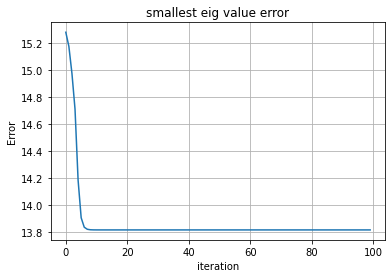

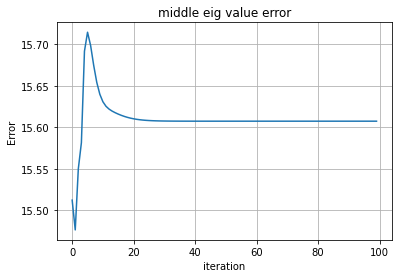

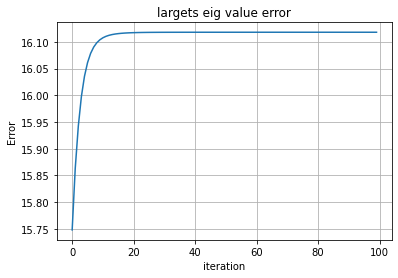

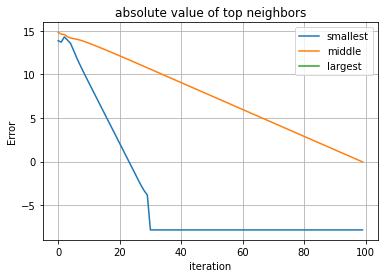

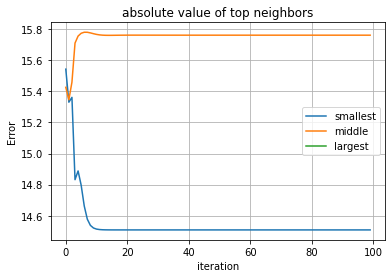


eig_values:
 [9999999.99956947 8999999.99919088 8000000.00121609 7000000.00002255
 6000000.00000092 5000000.00000002 4000000.00000001 3000000.00000003
 2000000.         1000000.        ]


In [555]:
#basic QR
eig_values = householder_reflection_shifted(H,true_eigs=[1,5,7],plot_metrics = True, qr_alg = 'basic',
                                   tol = 1e-6, itr = 100,verbose = False)
print('\neig_values:\n',eig_values)

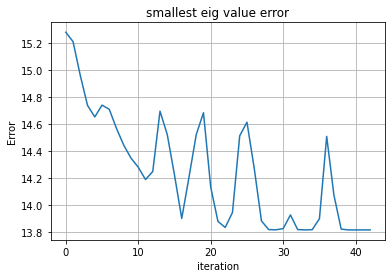

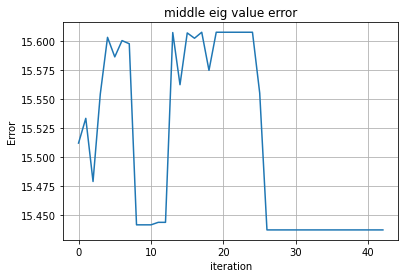

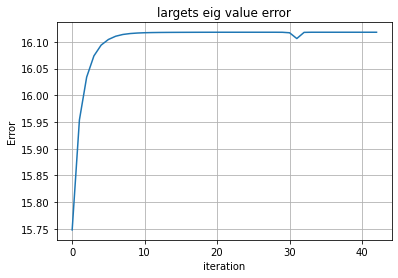

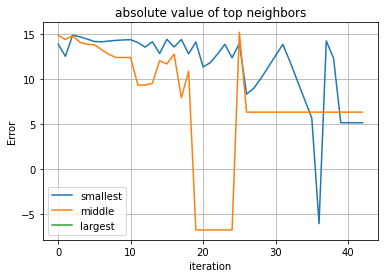

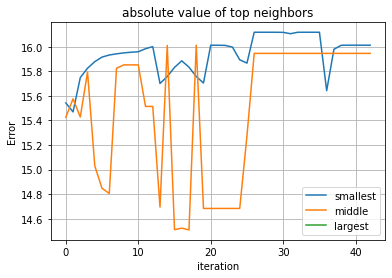


eig_values
 [10000000.00000001  9000000.00000001  1000000.00000002  1999999.99999999
  7999999.99999999  6999999.99999999  6000000.          3000000.
  5000000.          4000000.        ]


In [556]:
#wilinson shift QR
eig_values = householder_reflection_shifted(H,true_eigs=[1,5,7],plot_metrics = True, qr_alg = 'wilkinson',
                                            tol = 1e-4, itr = 50,verbose = False)
print('\neig_values\n',eig_values)

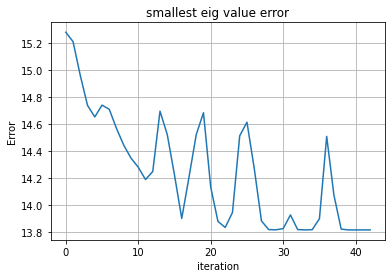

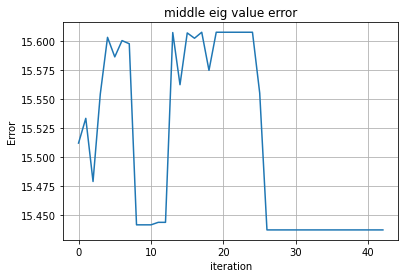

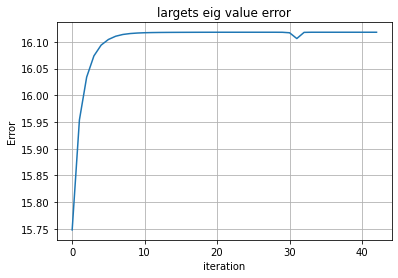

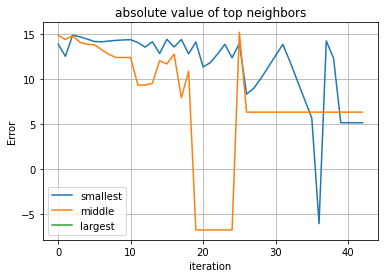

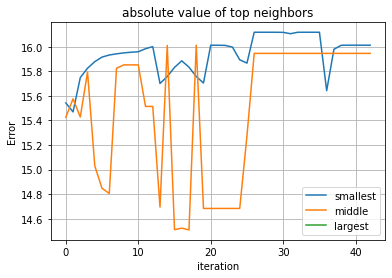


eig_values
 [10000000.00000001  9000000.00000001  1000000.00000002  1999999.99999999
  7999999.99999999  6999999.99999999  6000000.          3000000.
  5000000.          4000000.        ]


In [557]:
#wilinson shift QR
eig_values = householder_reflection_shifted(H,true_eigs=[1,5,7],plot_metrics = True, qr_alg = 'wilkinson',
                                            tol = 1e-4, itr = 50,verbose = False)
print('\neig_values\n',eig_values)

# Q7

In [562]:
D = np.diag([1,2,3,4,5,6,7,8,9,10])
if False:
    print('\nD\n',D)
A = np.dot(Q.T, np.dot(D,Q))
if False:
    print('\nA\n',np.round(A))
_,H = householder_reflection_hess(A)
print(H.shape)
H = H[1:len(H),1:len(H)]
print(H.shape)
np.round(H)

(10, 10)
(9, 9)


array([[ 4., -3., -0., -0., -0., -0., -0.,  0.,  0.],
       [-3.,  6.,  2., -0., -0.,  0.,  0.,  0., -0.],
       [ 0.,  2.,  6., -2., -0., -0.,  0., -0.,  0.],
       [-0.,  0., -2.,  5., -2., -0., -0., -0., -0.],
       [ 0., -0.,  0., -2.,  6., -2., -0.,  0., -0.],
       [ 0., -0.,  0.,  0., -2.,  5.,  2., -0., -0.],
       [-0.,  0.,  0.,  0.,  0.,  2.,  6.,  1.,  0.],
       [-0., -0.,  0.,  0.,  0., -0.,  1.,  6., -1.],
       [-0., -0., -0.,  0., -0.,  0.,  0., -1.,  5.]])

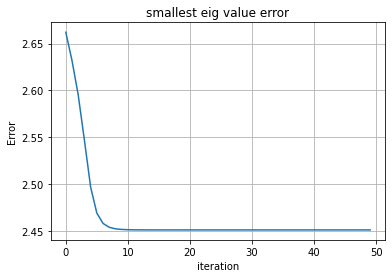

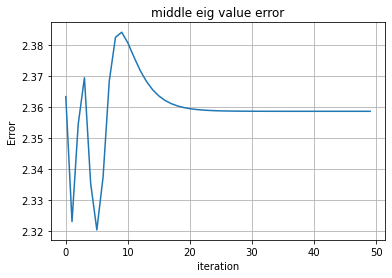

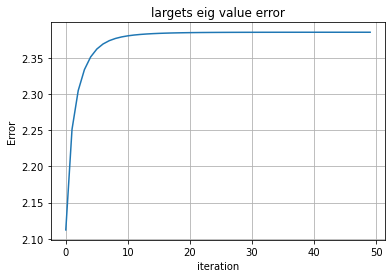

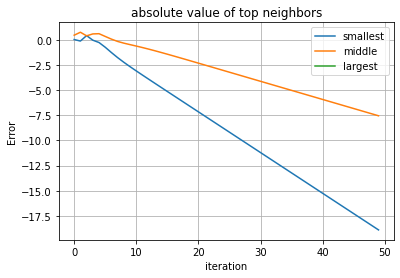

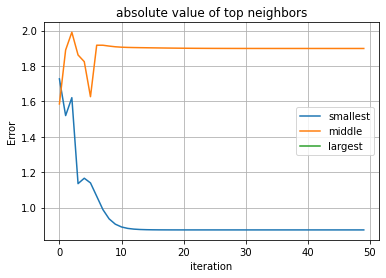


eig_values:
 [9.86710263 8.93281718 7.70664097 6.67949921 5.57561558 4.08514462
 3.28806425 2.39707818 1.59838942]


In [563]:
#basic QR
eig_values = householder_reflection_shifted(H,true_eigs=[-10,-5,-1],plot_metrics = True, qr_alg = 'basic',
                                   tol = 1e-6, itr = 50,verbose = False)
print('\neig_values:\n',eig_values)

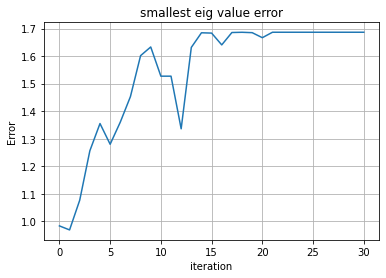

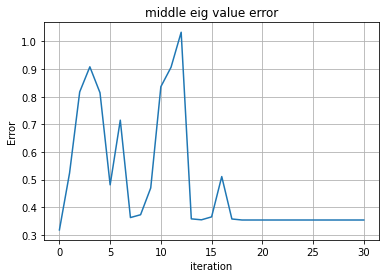

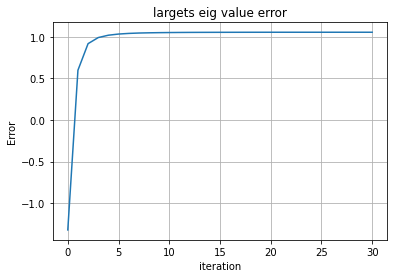

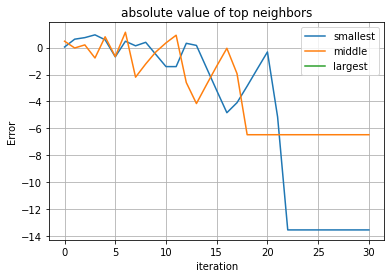

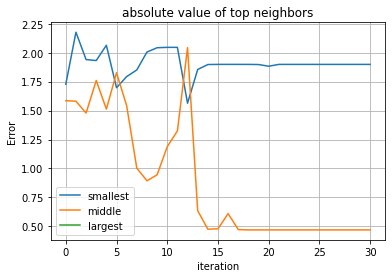


eig_values
 [10.  9.  8.  7.  2.  6.  2.  3.  4.]


In [564]:
#wilinson shift QR
eig_values = householder_reflection_shifted(H,true_eigs=[1,5,7],plot_metrics = True, qr_alg = 'wilkinson',
                                            tol = 1e-6, itr = 50,verbose = False)
print('\neig_values\n',np.round(eig_values))

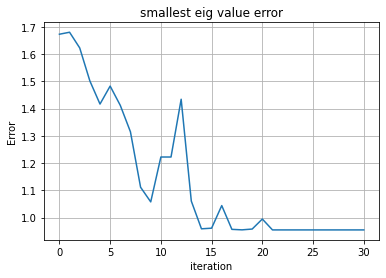

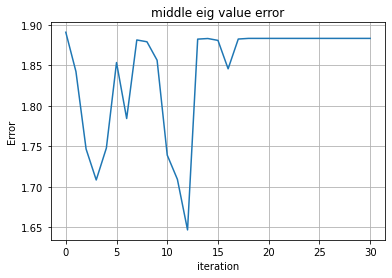

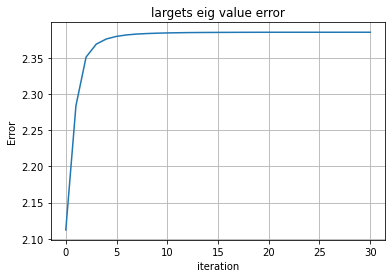

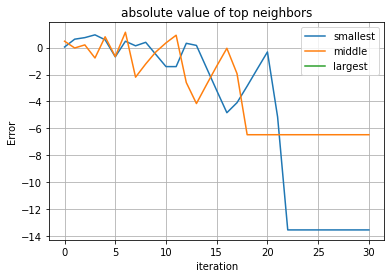

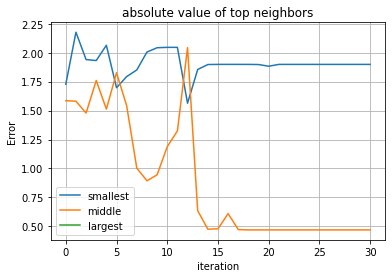


eig_values
 [10.  9.  8.  7.  2.  6.  2.  3.  4.]


In [565]:
#wilinson shift QR
eig_values = householder_reflection_shifted(H,true_eigs=[-10,-5,-1],plot_metrics = True, qr_alg = 'wilkinson',
                                            tol = 1e-6, itr = 50,verbose = False)
print('\neig_values\n',np.round(eig_values))